In [10]:
# 날짜 및 검색어 설정
from_date = '20230323'
to_date = '20230323'
topic = 'finance OR banking OR  investment OR  economy'

In [11]:
from datetime import datetime
import logging
import re
import numpy as np
import pandas as pd
import os
import pickle
import networkx as nx
from pyvis.network import Network

# 워드 클라우드
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from matplotlib.pyplot import figure

from wordcloud import (WordCloud, get_single_color_func)

In [12]:
def DrawPointColoredWC(tags,title,cwd,topic, drop_list=[], color = '#00ff00', pointed_list=[]):
    color_to_words = {
        color : pointed_list
    }

    use_tags = tags.drop(drop_list, errors = 'ignore')
    wc = WordCloud(font_path='C:/Windows/Fonts/malgun',background_color="white",width=1600, height=800,random_state = 1)

    default_color = 'black'
    grouped_color_func = GroupedColorFunc(color_to_words, default_color)

    cloud = wc.generate_from_frequencies(dict(use_tags))
    wc.recolor(color_func=grouped_color_func)

    figure(dpi=1200)
    figure(figsize=[12,8])
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")
    plt.savefig(cwd + '/' + topic + '/'+ title + ' 강조'+'.pdf')
    plt.show()

In [13]:
class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)


class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

In [14]:
# 데이터 전처리
cwd = os.getcwd()
path = cwd +'/' + topic + '/raw'

df_cnt = pd.read_csv(cwd +'/' + topic + '/'+ 'Monthly_Count_Keyword {}-{}.csv'.format(from_date,to_date),index_col = 'keyword')

main_path = cwd + '/' + topic
name = "Keyword{}-{}.pickle".format(from_date,to_date)
name = name.replace('/','.')
with open(main_path + '/' + 'keyword/' + name, 'rb') as f:
    data_e = pickle.load(f)
    
result = data_e[['일자','url']].explode('url').reset_index(drop=True)
url_long_data = result.explode('url').reset_index(drop=True)

keyword_long_data = data_e[['일자','키워드']].explode('키워드').reset_index(drop=True)

print('{}로 검색하여 {}부터 {}까지 {} 건의 기사를 인용했습니다.'.format(topic,from_date,to_date,len(url_long_data )))

finance OR banking OR  investment OR  economy로 검색하여 20230323부터 20230323까지 249 건의 기사를 인용했습니다.


In [24]:
# 최대 키워드 수, 지울 단어, 강조할 단어 지정
num_exp = 50
drop_list = [np.nan,'cookies']
num = num_exp + len(drop_list)
color_to_words = {
    '#00ff00': []
}

20230323에서 20230323까지 키워드 출현 빈도 순 상위 52개 입니다


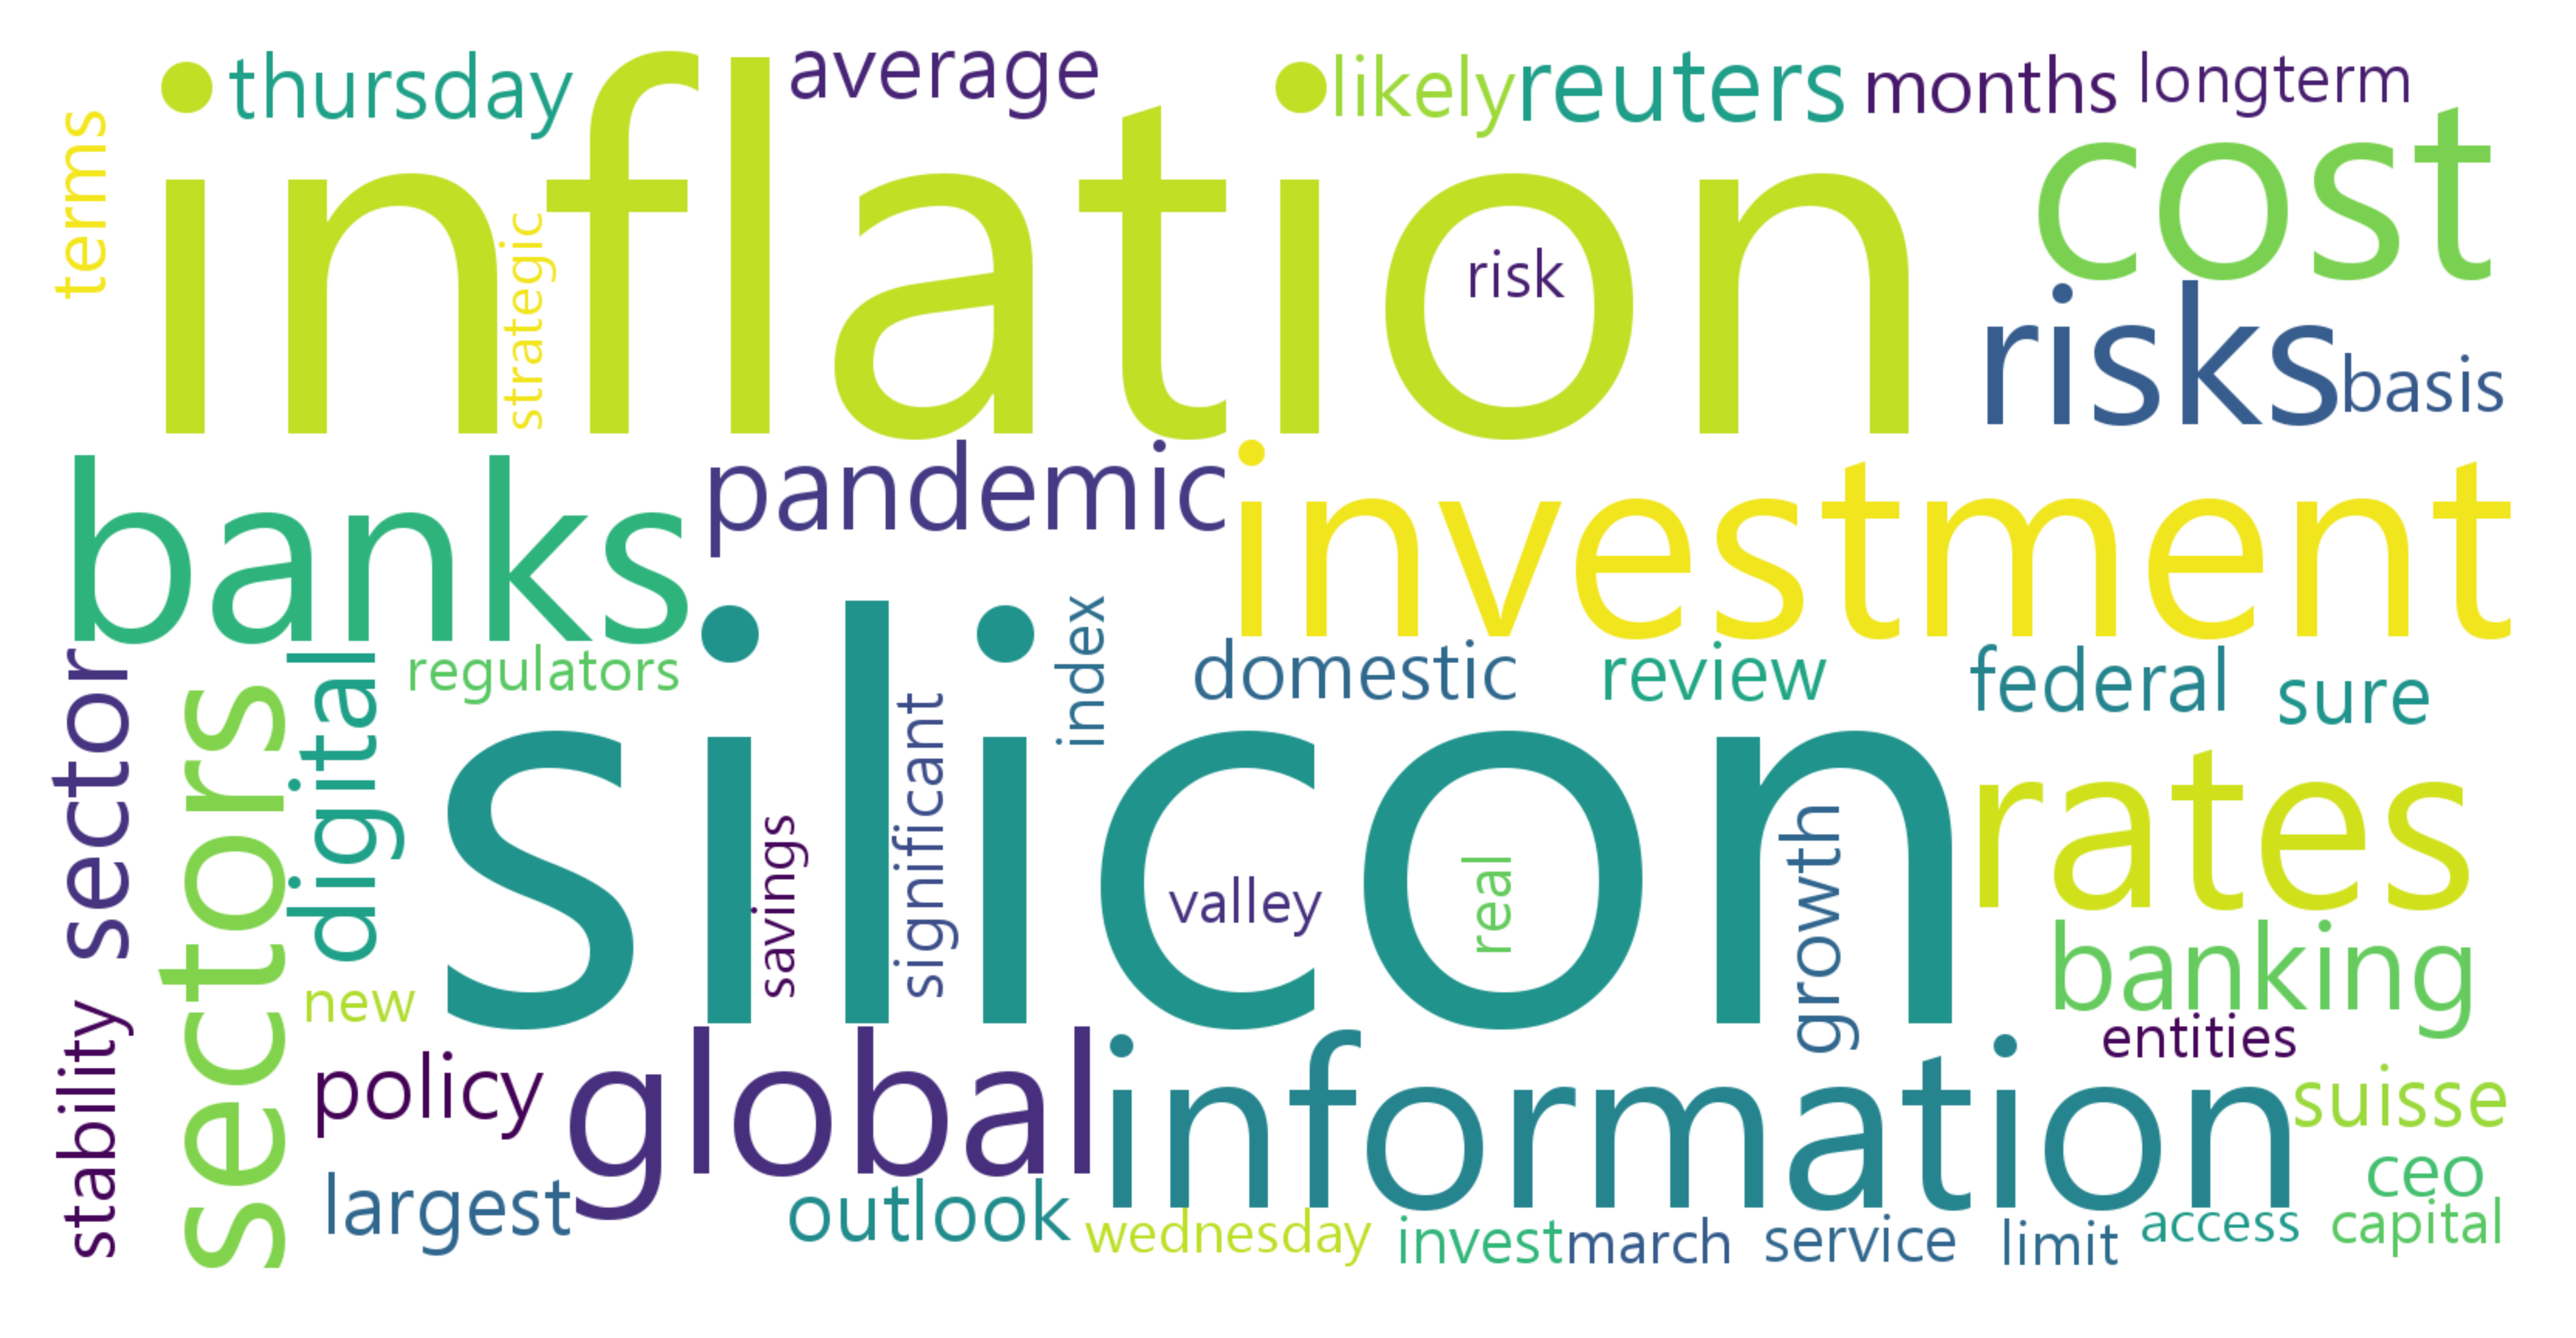

In [25]:
# 그림 그리기 및 저장
print('{}에서 {}까지 키워드 출현 빈도 순 상위 {}개 입니다'.format(from_date,to_date,num_exp))
tags = df_cnt.sort_values(by = 'tot_cnt', ascending = False)[1:num+1]['tot_cnt']
tags = tags.drop(drop_list)
wc = WordCloud(font_path='C:/Windows/Fonts/malgun',background_color="white",width=1600, height=800)
# default_color = 'black'
# grouped_color_func = GroupedColorFunc(color_to_words, default_color)

cloud = wc.generate_from_frequencies(dict(tags))
# wc.recolor(color_func=grouped_color_func)

figure(dpi=1200)
title = '대상기간_최대출현_키워드_{}개'.format(str(num))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.savefig(cwd + '/' + topic + '/'+ title + from_date + '.pdf')
plt.show()


In [17]:
keyword = 'outlook'

In [18]:
tmp = []
for i in keyword_long_data['키워드']:
    if keyword in i:
        tmp.append(True)
    else:
        tmp.append(False)

for url in url_long_data[tmp]['url']:
    print(url)

https://www.cnn.com/2023/03/23/investing/credit-suisse-ubs-impact-switzerland/index.html
https://techcrunch.com/2023/03/23/how-to-spot-investment-worthy-founders-look-for-mindset-competence-and-confidence/
https://www.hellenicshippingnews.com/banking-turmoil-could-impact-global-economy-in-coming-quarters-bank-of-spain-says/
https://www.africanews.com/2023/03/23/south-africas-economy-at-risk-of-stagnation-says-imf/
https://news.sky.com/story/big-shift-in-bank-of-england-thinking-suggests-economy-showing-signs-of-recovery-12840816
https://fortune.com/2023/03/23/banking-crisis-credit-crunch-recession-fears-federal-reserve/
https://www.ips-journal.eu/topics/economy-and-ecology/feminist-economics-for-all-6593/
https://www.hellenicshippingnews.com/investors-dumped-oil-as-banking-crisis-erupted/
https://www.iflr.com/article/2bfopawyorihmdgdfwagw/sponsored/esg-significance-and-challenges-in-luxembourgs-investment-funds-industry
https://www.bnnbloomberg.ca/big-driver-of-the-global-economy-last-